# Using GBM DRM
##### J. Michael Burgess (jamesb@kth.se)

GBMDRM allows you to:
* Open a GBM RSP file
* Simulated count spectra by folding the model through the RSP and applying Poission statistics to the counts


In [1]:
%pylab inline

#import the class
from gbmdrm import GBMDRM

Populating the interactive namespace from numpy and matplotlib


### Select the GBM DRM you wish to examine and instantiate an object

In [2]:
rspfile = "glg_cspec_n0_bn080916009_v07.rsp"

gbm_detector = GBMDRM(rspfile)



### Display it if you wish:

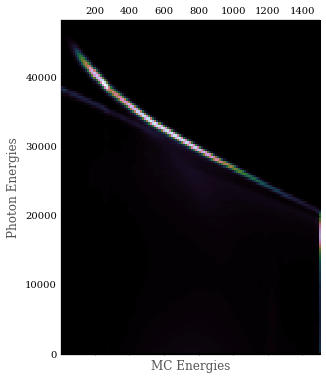

In [3]:
fig, ax = plt.subplots(figsize=(6,6))

ax.matshow(gbm_detector.GetDRM(),cmap=plt.cm.cubehelix,extent=[min(gbm_detector.GetMCEdges()),
                                      max(gbm_detector.GetMCEdges()),
                                      min(gbm_detector.GetPhotonEdges()),
                                      max(gbm_detector.GetPhotonEdges())])
ax.set_xlabel('MC Energies')
ax.set_ylabel('Photon Energies')
ax.set_aspect(.04)

## Simulating/Folding

### Say you want to fold a power law through the RSP:

#### Define your model


In [4]:
def power_law(ene,A,idx):
    return A*(ene/300.)**idx
    

In [5]:
# Pass to the drm

gbm_detector.SetModel(power_law)

# Set the parameters

gbm_detector.SetParams(1.,-2.)

### Just folding

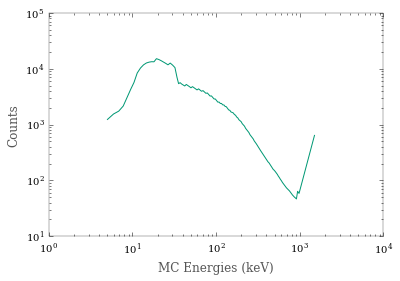

In [6]:
loglog(gbm_detector.GetMCEdges(),gbm_detector.GetModelCnts())
xlabel("MC Energies (keV)")
ylabel("Counts")


### But maybe you want to get rid of the overflow channels

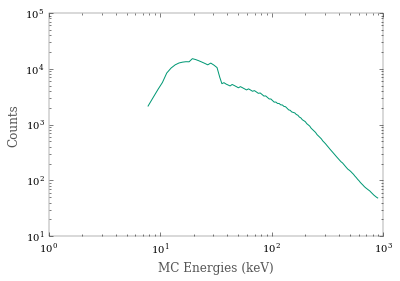

In [7]:
gbm_detector.SelectEnergies([8,900]) #  keV

loglog(gbm_detector.GetMCEdges(),gbm_detector.GetModelCnts())


xlabel("MC Energies (keV)")
ylabel("Counts")

### Finally, adding Poisson variance to the counts

You have already set the model at this stage

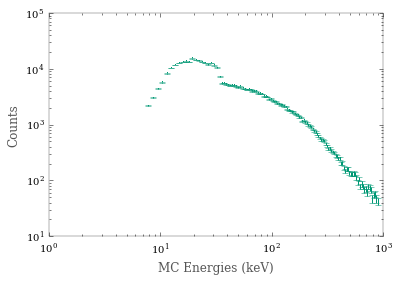

In [11]:

sim_counts = gbm_detector.SimSpectrum(1.,-2.)

errorbar(gbm_detector.GetMCEdges(),sim_counts[gbm_detector.GetEnergySelection()],yerr=sqrt(sim_counts[gbm_detector.GetEnergySelection()]),fmt=',')
xscale('log')
yscale('log')

xlabel("MC Energies (keV)")
ylabel("Counts")